In [155]:
#Please note that the following code has a lot of comments so that my thought process of writing each line of code is documented
#Some extra steps have been carried out just to show my thought process.

In [156]:
#Import some of the required libraries

import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
#import CSV file

dataset = pd.read_csv("df_modeling.csv")

<h2> 1. Perform basic quality checks <h/2>

In [158]:
#Find Basic information about our dataset. Data types, size, column names and null values if any

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
Unnamed: 0    391 non-null int64
date          391 non-null object
facebook      391 non-null float64
google        391 non-null float64
criteo        391 non-null float64
affiliates    391 non-null float64
orders        391 non-null int64
price         391 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 24.5+ KB


In [159]:
#Data has a smaller sample in terms of rows, and lacks variables such as economy, weather, subsector dummies etc.
#Hence scores  poorly on completeness dimension of quality checks. I am not doing any formal data quality validation
#tests in this exercise. Only enough to get the exercise done. The six dimensions are completeness, timeliness, accuracy,
#uniqueness, validity and consistency

In [160]:
#Checking the head and tail of the dataset. Interested in the unnamed index column values. 
#Also Facebook activity is zero in head

dataset.head(5)

,Unnamed: 0,date,facebook,google,criteo,affiliates,orders,price
0,1,1/1/19,0.0,522.32,0.0,0.0,115,51.680348
1,2,1/2/19,0.0,626.26,0.0,0.0,147,58.323673
2,3,1/3/19,0.0,618.59,0.0,0.0,183,53.576557
3,4,1/4/19,0.0,494.46,0.0,0.0,126,56.472857
4,5,1/5/19,0.0,568.91,0.0,0.0,144,53.940000


In [161]:
dataset.tail(5)

#Facebook marketing spend is quite high in the tail rows

,Unnamed: 0,date,facebook,google,criteo,affiliates,orders,price
386,387,1/22/20,4021.279997,2445.542854,288.940005,5280.0,1320,52.014232
387,388,1/23/20,4581.459997,2154.764297,321.060006,4440.0,1001,65.178040
388,389,1/24/20,4238.829995,2083.268332,192.220003,2970.0,697,67.705250
389,390,1/25/20,3100.689993,3144.399846,229.110006,3555.0,749,65.678329
390,391,1/26/20,3394.989995,2612.120900,295.590003,2910.0,786,64.339626


In [162]:
#Rename the unnamed column and use it as a proxy to derive "days since the marketing started metric". 
#Assuming makreting activity/spend only started since the 1st of JAn 2019
#More features to be created during feature engineering. 
#Given the limited sample and no prerequisite knowledge on the subsector
#we cannot really tell if there is a #time trend in the data. The improvement or reduction in base over time can also be
#attributed to lag effects. Depends on the product maturity lifecyle as well. If a recent launch then all base can be attributed
#to marketing spend

dataset.rename( columns={'Unnamed: 0':'NoOFdays'}, inplace=True )


In [163]:
#Checking the tail to see if the unnamed column has been renamed. 

dataset.tail(5)

,NoOFdays,date,facebook,google,criteo,affiliates,orders,price
386,387,1/22/20,4021.279997,2445.542854,288.940005,5280.0,1320,52.014232
387,388,1/23/20,4581.459997,2154.764297,321.060006,4440.0,1001,65.178040
388,389,1/24/20,4238.829995,2083.268332,192.220003,2970.0,697,67.705250
389,390,1/25/20,3100.689993,3144.399846,229.110006,3555.0,749,65.678329
390,391,1/26/20,3394.989995,2612.120900,295.590003,2910.0,786,64.339626


In [164]:
#Creating a new dataset that I will keep for later use during feature engineering

dataset2 = dataset

#Convert date column from an object to a date format in that dataset.

dataset2['date'] = pd.to_datetime(dataset2['date'])

In [165]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
NoOFdays      391 non-null int64
date          391 non-null datetime64[ns]
facebook      391 non-null float64
google        391 non-null float64
criteo        391 non-null float64
affiliates    391 non-null float64
orders        391 non-null int64
price         391 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 24.5 KB


In [166]:
#For now I will drop the date column. 
dataset1 = dataset2.drop('date', axis=1)

In [167]:
dataset1.head(5)

,NoOFdays,facebook,google,criteo,affiliates,orders,price
0,1,0.0,522.32,0.0,0.0,115,51.680348
1,2,0.0,626.26,0.0,0.0,147,58.323673
2,3,0.0,618.59,0.0,0.0,183,53.576557
3,4,0.0,494.46,0.0,0.0,126,56.472857
4,5,0.0,568.91,0.0,0.0,144,53.940000


In [168]:
dataset1.tail(5)

,NoOFdays,facebook,google,criteo,affiliates,orders,price
386,387,4021.279997,2445.542854,288.940005,5280.0,1320,52.014232
387,388,4581.459997,2154.764297,321.060006,4440.0,1001,65.178040
388,389,4238.829995,2083.268332,192.220003,2970.0,697,67.705250
389,390,3100.689993,3144.399846,229.110006,3555.0,749,65.678329
390,391,3394.989995,2612.120900,295.590003,2910.0,786,64.339626


In [169]:
#Next data quality check is for null values
dataset1.isnull().any()

NoOFdays      False
facebook      False
google        False
criteo        False
affiliates    False
orders        False
price         False
dtype: bool

In [170]:
#Check for duplicate values

DuplicateDates = dataset2[dataset2.duplicated(['date'])]
print ("Duplicate rows based on the date column are:", DuplicateDates, sep='\n')

Duplicate rows based on the date column are:
Empty DataFrame
Columns: [NoOFdays, date, facebook, google, criteo, affiliates, orders, price]
Index: []


<h2> 2. Perform basic exploratory analysis <h/2>

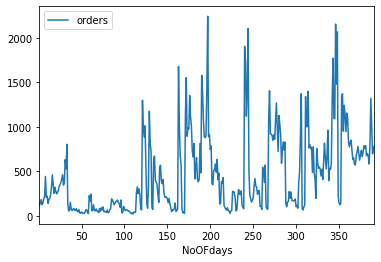

In [171]:
# Just a basic chart of orders per day across our dataset which has 391 rows/days
dataset1.plot.line(x='NoOFdays', y='orders')

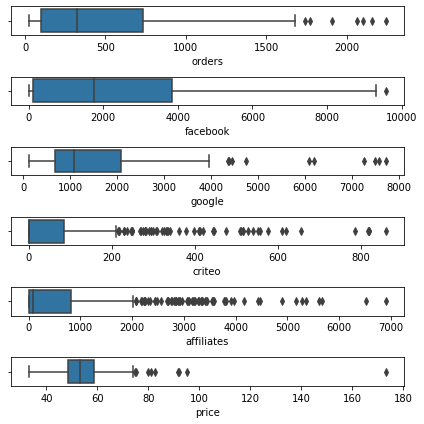

In [172]:
#Outlier analysis

fig, axs = plt.subplots(6, figsize = (6,6))
plt1 = sns.boxplot(dataset1['orders'], ax = axs[0])
plt2 = sns.boxplot(dataset1['facebook'], ax = axs[1])
plt3 = sns.boxplot(dataset1['google'], ax = axs[2])
plt4 = sns.boxplot(dataset1['criteo'], ax = axs[3])
plt5 = sns.boxplot(dataset1['affiliates'], ax = axs[4])
plt6 = sns.boxplot(dataset1['price'], ax = axs[5])


plt.tight_layout()

#it seems like we have tremendous amount of outliers to deal with. I would probably have to import and impute shopping festival
#holidays related data to deal with them. ALso helpful would have been industry sector knowledge. For e.g. back to school season
#for shoe sales, whereas Ramadan for car sales. Normally a seasonal dummy that would allow for pricing the impact of these
#Binning is another option to deal with outliers but its over use can impact model integrity, and also the limit the types of models that can be chosen.
#Later on in feature engineering we discover that almost 40% to 50% of our data is in the outlier range!

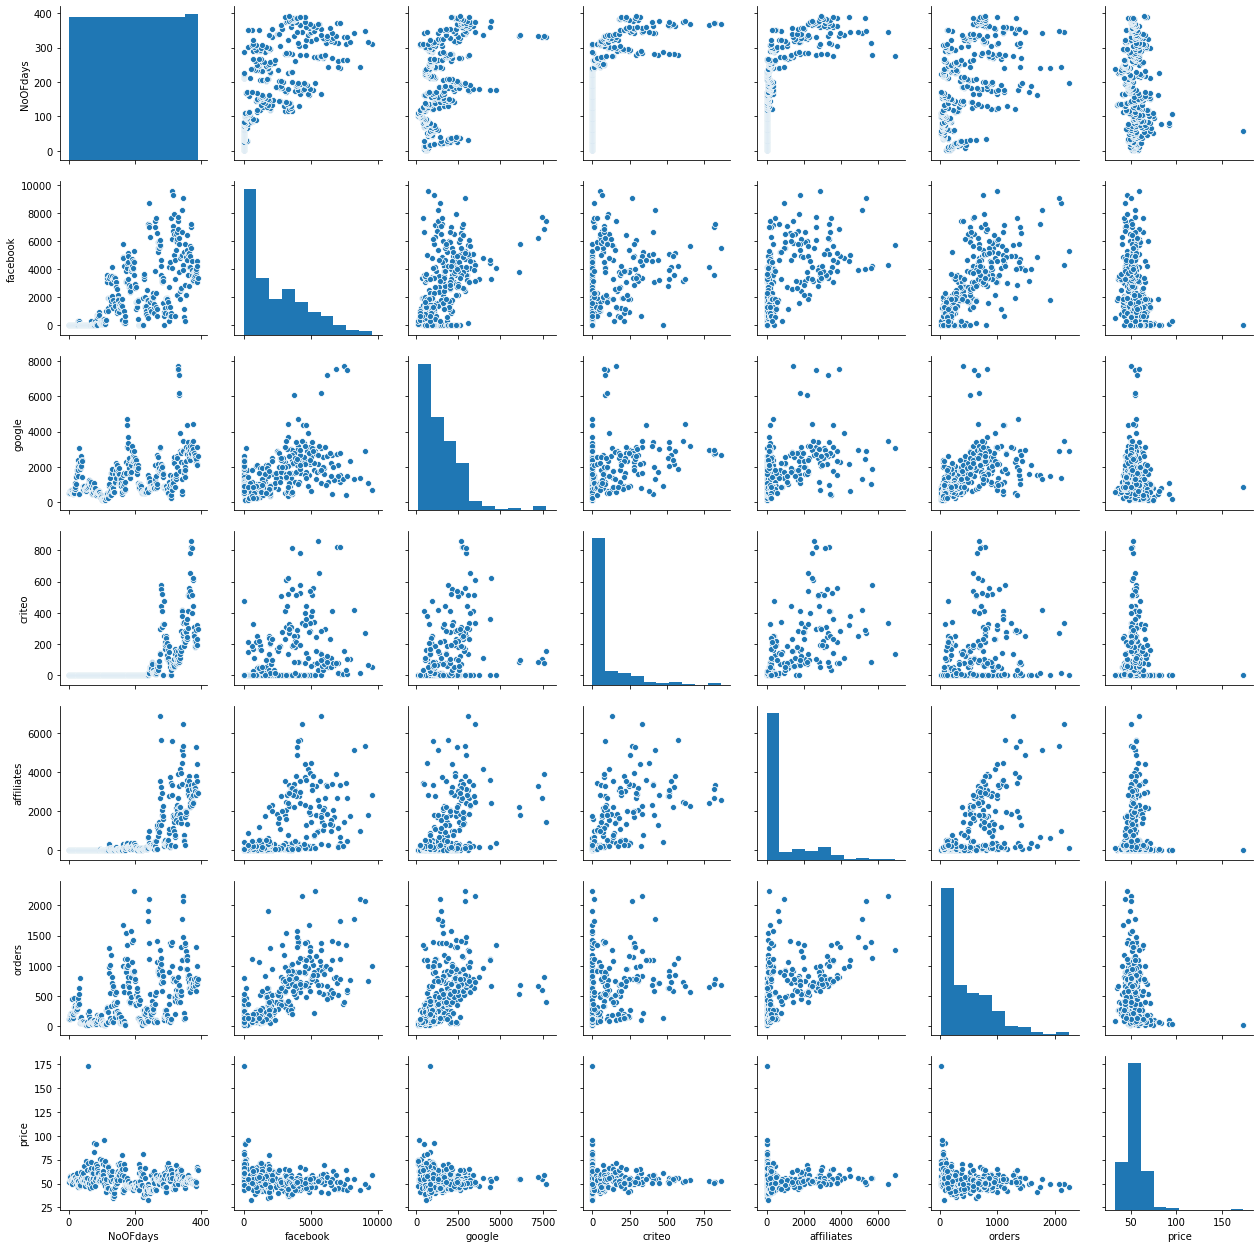

In [173]:
sns.pairplot(dataset1)

#The distribution of variables is not normal and hence violates OLS assumptions. 
#So if we ran a regression we would experience serial correlation or poor fits
#Also seems like a correlation trend in some of the X variables which could cause multicollinearity

In [174]:
#Taking logs. Added +1 in order to take care of zero values in Facebook column. Log of zero would return an error otherwise
a1 = np.log(dataset1 + 1)

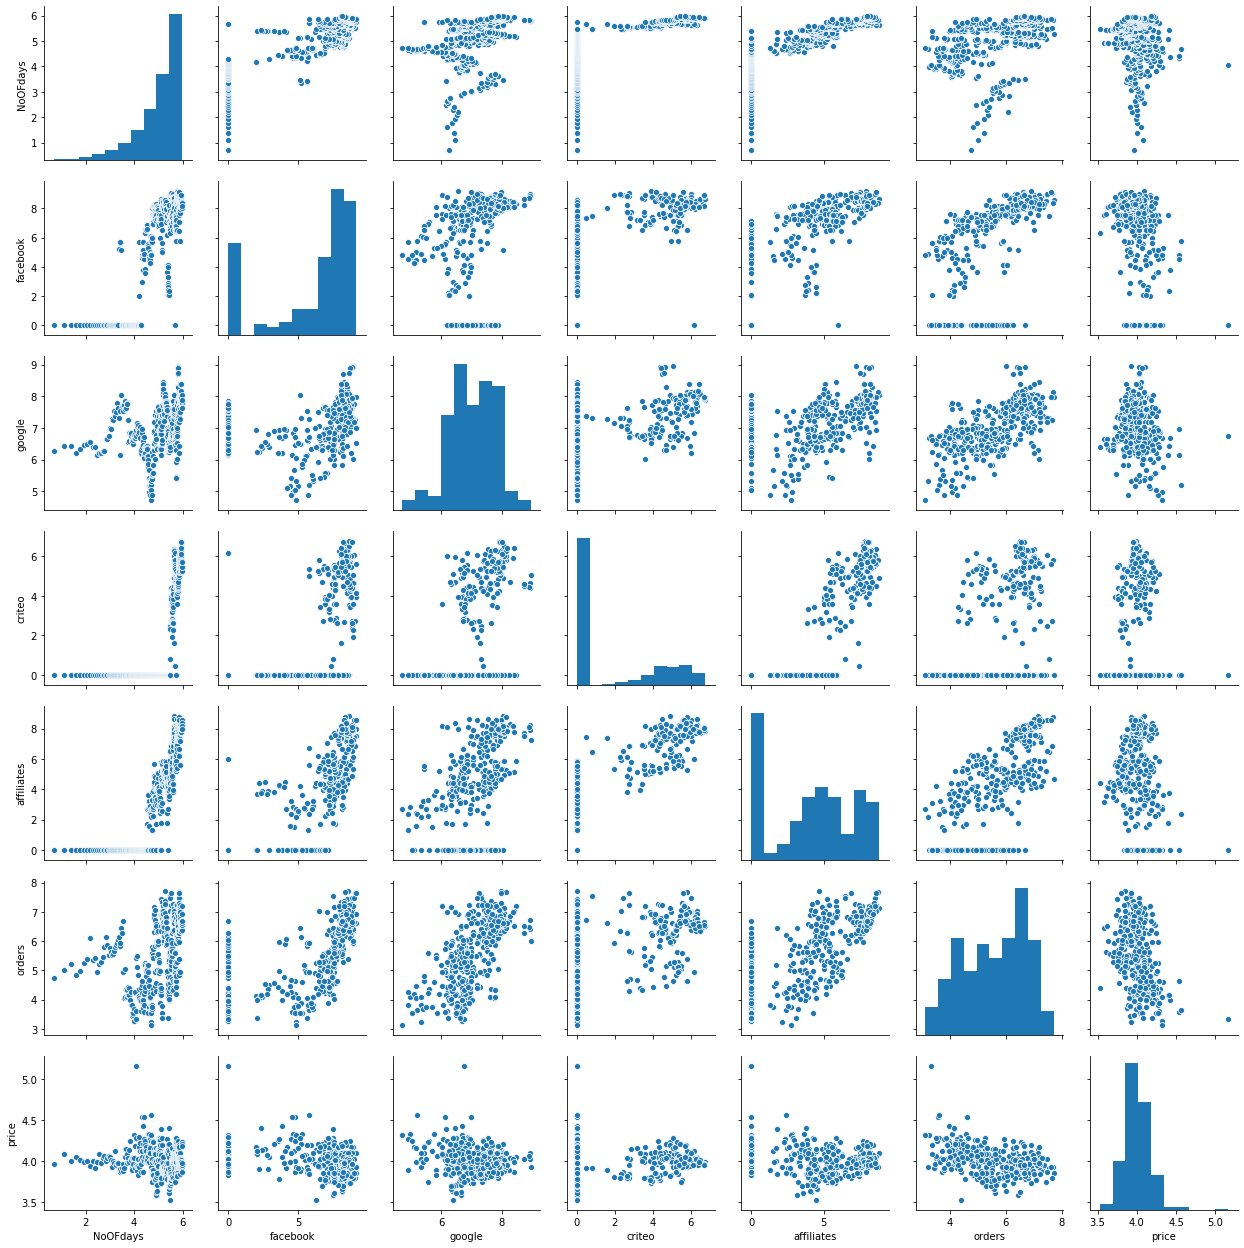

In [175]:
sns.pairplot(a1)

#The distributions have changed but they still look quite non linear / abnormal

In [176]:
#Taking differences of logs. I expect it to make the distributions of the variables relatively normal. 
#The interpretation in such a regression would be %change in X variables causes % change in y variables
difflog = a1.diff()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


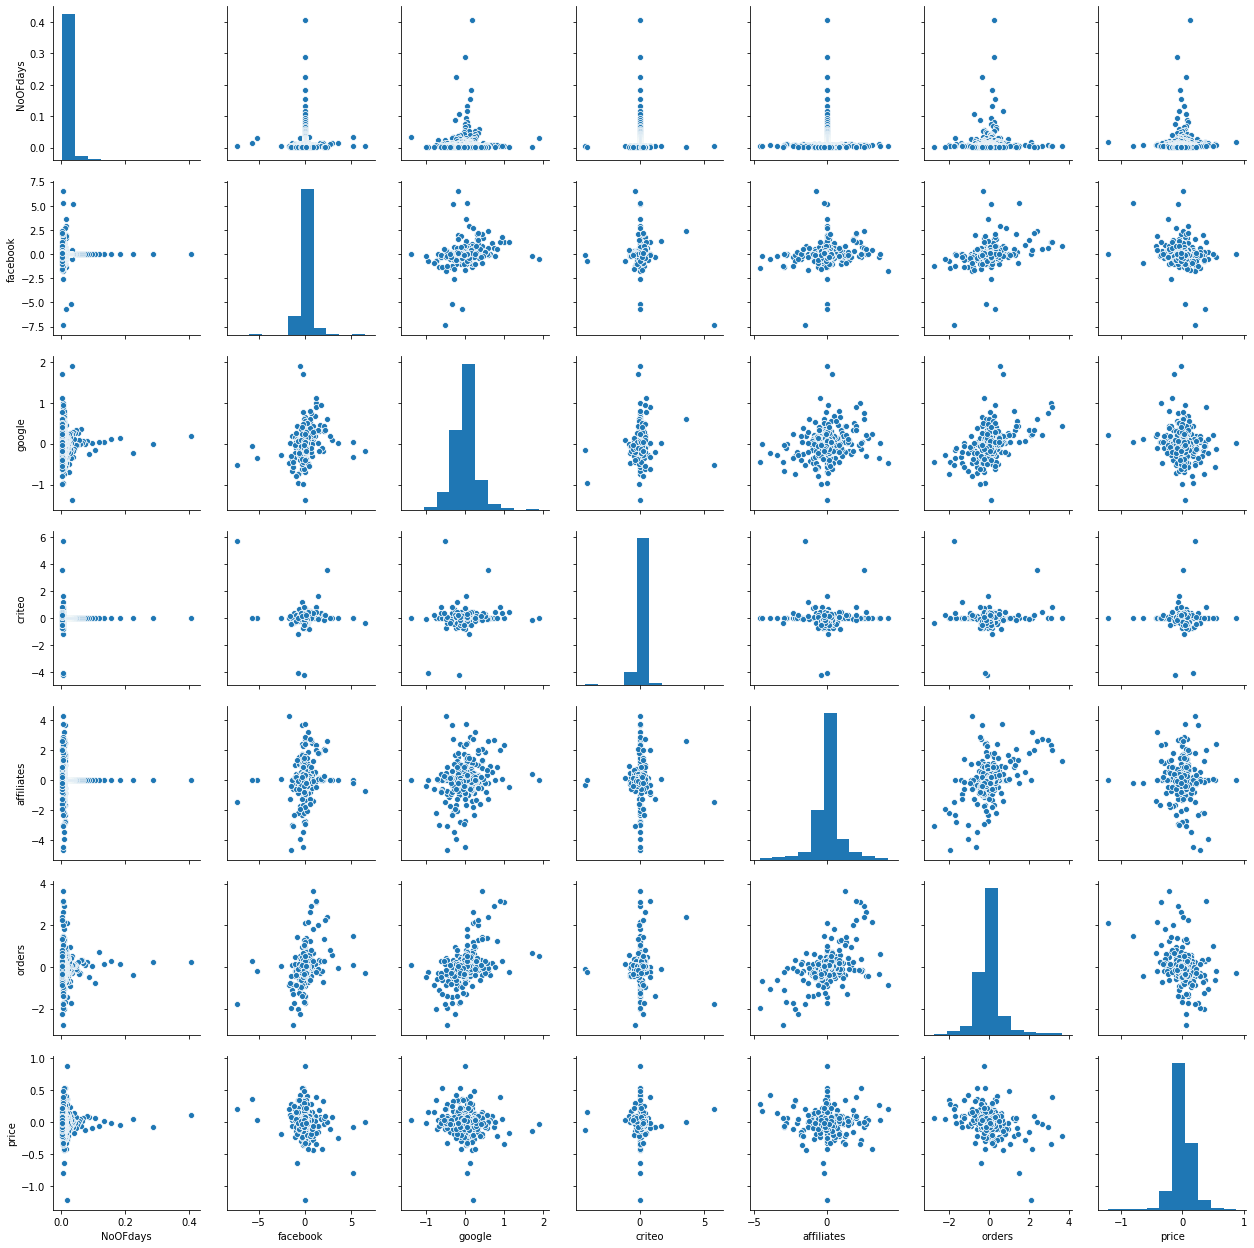

In [177]:
sns.pairplot(difflog)

#The individual variable distributions do look a bit normal now

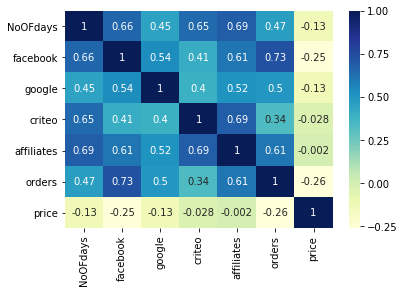

In [178]:
#Some correlation analysis to see the strength of relationships between X and Y variables and any multicollinearity

sns.heatmap(dataset1.corr(), cmap="YlGnBu", annot = True)

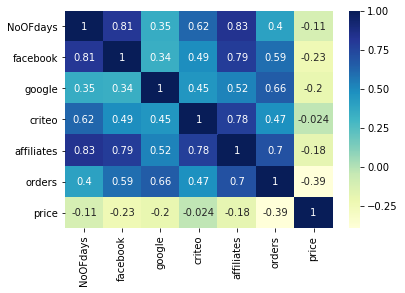

In [179]:
#Correlation amongst log variables

sns.heatmap(a1.corr(), cmap="YlGnBu", annot = True)

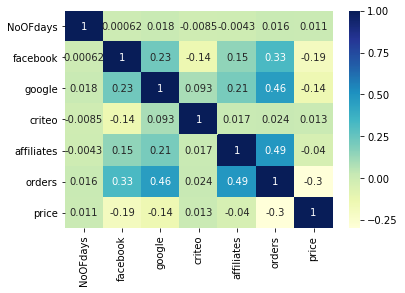

In [180]:
#correlation amongst log differenced variables

sns.heatmap(difflog.corr(), cmap="YlGnBu", annot = True)

In [181]:
dataset1.describe()

#Standard deviations are large in the non transformed dataset. This is the normal dataset with no log transforms

,NoOFdays,facebook,google,criteo,affiliates,orders,price
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,2303.565241,1483.969577,79.965244,752.570131,459.682864,54.422832
std,113.016223,2278.667850,1149.003257,157.964801,1302.020131,435.850488,10.617420
min,1.000000,0.000000,111.170000,0.000000,0.000000,22.000000,32.979825
25%,98.500000,122.935000,669.282690,0.000000,0.000000,101.000000,48.359530
50%,196.000000,1758.020000,1072.945453,0.000000,87.115500,320.000000,53.326620
75%,293.500000,3835.649995,2087.814630,85.414998,825.000000,733.500000,58.687278
max,391.000000,9574.029999,7715.014317,860.160032,6900.000000,2242.000000,173.180000


In [182]:
#I want to study the outliers a bit further since they can create a lot of problems during model development
#In a normal distribution, 68% of data lies within 1 standard deviation of the mean (1SD), 95% in 2SD and 99% in 3SD.
#Calculating the Standard Deviations below shows that the data has too many outliers to deal with. 
#Additional variables, feature engineering required

TwoSD = (np.std(dataset1)*2) + np.mean(dataset1)
print (TwoSD)

NoOFdays       421.743217
facebook      6855.069414
google        3779.035583
criteo         395.490585
affiliates    3353.278287
orders        1330.268420
price           75.630501
dtype: float64


In [183]:
#Calcuating the 3 standard deviations. Surprising to see how the maximum values calculated earlier are so far out of 3SD.

ThreeSD = (np.std(dataset1)*3) + np.mean(dataset1)
print (ThreeSD)

NoOFdays       534.614825
facebook      9130.821501
google        4926.568586
criteo         553.253255
affiliates    4653.632365
orders        1765.561197
price           86.234335
dtype: float64


<h2> 3. Initial Model Development <h/2>

<h5> Now we have an idea of what we are dealing with here, through data exploration, and indication of possible results we might get as a result of the initial modeling exercise. I am running OLS regression as part of this exercise. On the job/actual project, I would have the time to complete more complex models. <h/5>

In [184]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<h4> Model 1  - OLS Regression <h/4>

In [185]:
# Putting feature variable to X
X = dataset1[['facebook', 'affiliates', 'criteo', 'price', 'google']]

# Putting response variable to y
y = dataset1['orders']

In [186]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so we need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line (no need of defining a function as this is pretty short code)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

#The regression below has low Durban Watson statistic, indicating a high level of serial correlation. This violates OLS assumptions

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.09e-76
Time:                        01:44:34   Log-Likelihood:                -2746.6
No. Observations:                 391   AIC:                             5505.
Df Residuals:                     385   BIC:                             5529.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.3928     83.022      5.112      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
#T stat and P values look quite significant. Constant term is too big and looks fishy. Unless we are selling a consumer
#staples such as electricity or petrol, the base shouldn't be so big but we ignore this since we are unaware of the industry
#Durban watson is 0.8 so we have autocorrelation.
#R squared is not as significant as we would want but it is still okay.

<h4> Model 2: OLS Regression without the constant term <h/4>

In [188]:
#Pretty much the same results without the constant term. This was just an experiment.

from statsmodels.formula.api import ols

lm2 = ols("orders ~ google + facebook + criteo + affiliates + price", data=dataset1).fit()

print(lm2.summary())

#We still have the same high autocorrelation given the low Durban Watson statistic in the results below. 
#Hence our regression is void as it is vioting OLS assumptions.

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.09e-76
Time:                        01:44:34   Log-Likelihood:                -2746.6
No. Observations:                 391   AIC:                             5505.
Df Residuals:                     385   BIC:                             5529.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.3928     83.022      5.112      0.0

<h4> Lets do some evaluations on these regressions anyway. The reason being that I want to know a bit more about the residuals and see how they look like to perhaps understand the reasons underlying the autocorrelation <h/4>

In [189]:
#Calculating the residuals

pred_val = lm2.fittedvalues.copy()
true_val = dataset1['orders'].values.copy()
residual = true_val - pred_val

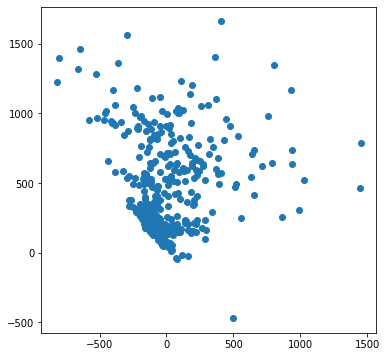

In [190]:
#Plot the residuals

fig, ax = plt.subplots(figsize=(6,6))
_ = ax.scatter(residual, pred_val)

#They look like a nightmare. Thet are very far from having a constant mean and constant varainces, 
#which are underlying assumptions of OLS Regression

0.8596025266748436

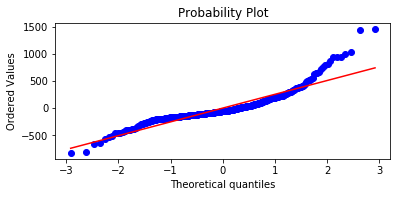

In [191]:
#We can plot a normal probability plot to assess how the data (error) departs from normality visually:

import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

#Normality is not looking that bad. Seems like there are very strong underlying non linear trends that are out of scope for OLS
#Regression to capture. I still see very heavy outliers.

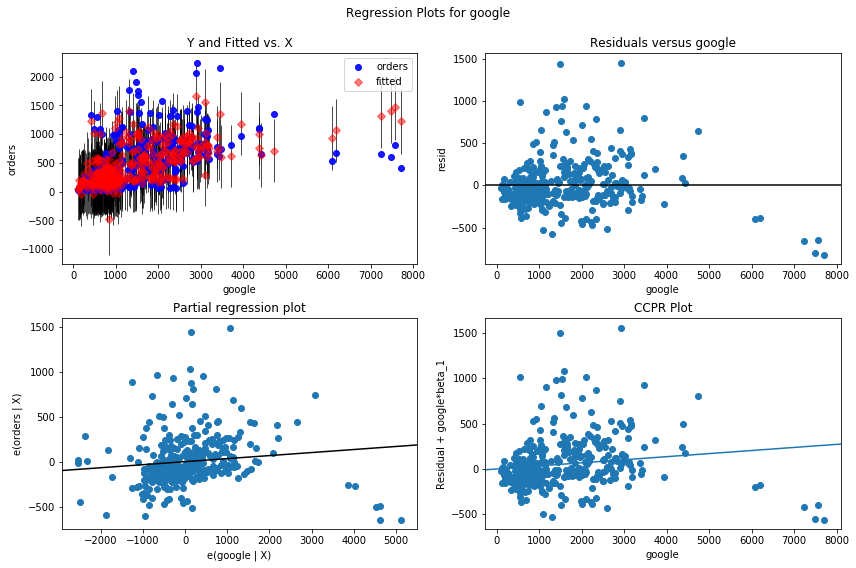

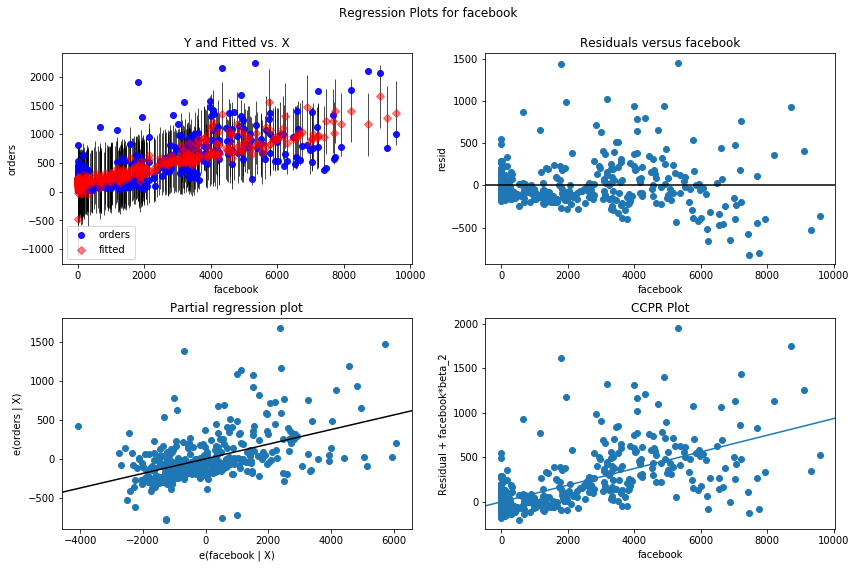

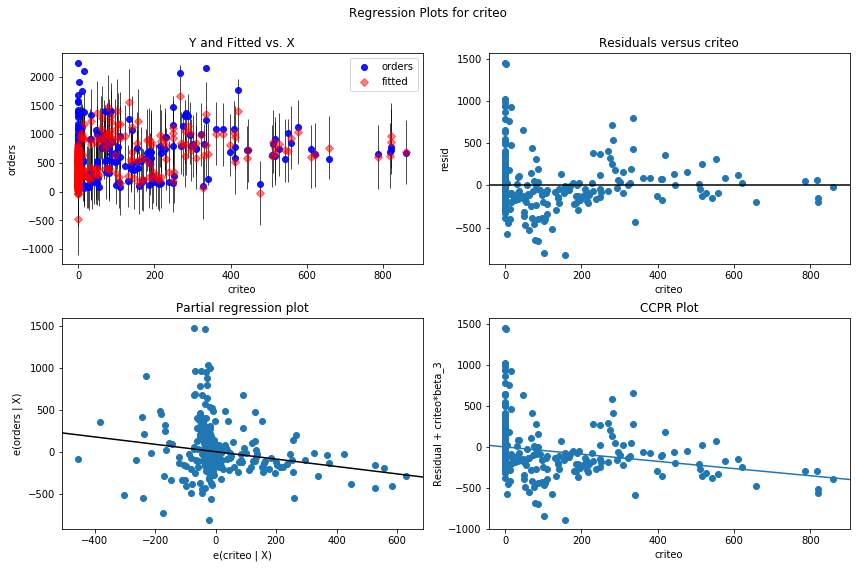

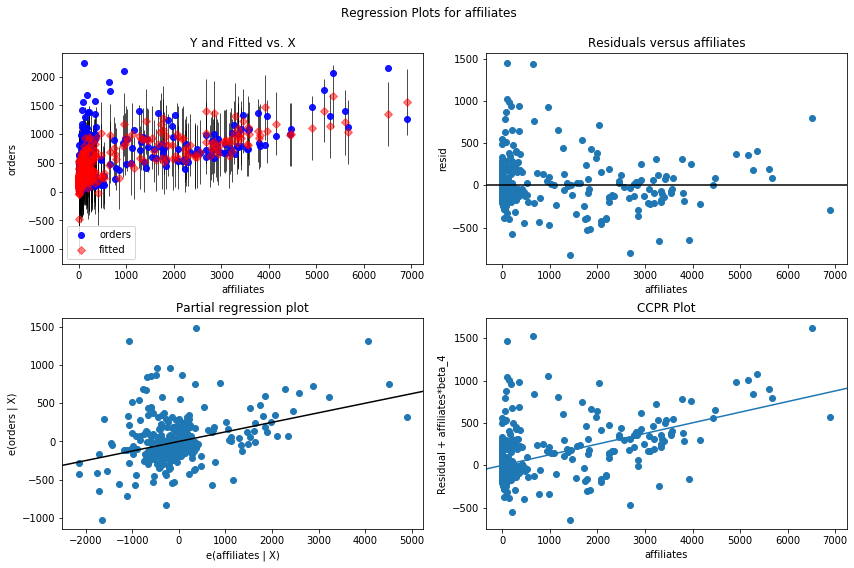

In [192]:
#Fit for Facebook and Criteo are relatively better. I just see an enourmous amount of outliers, 
#which are negatively impacting the fit. I think as a next step its a good idea to deal with outliers

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, "google", fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, "facebook", fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, "criteo", fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, "affiliates", fig=fig)

<h4> Model 3 - OLS Regression with differenced logs <h/4>

In [193]:

from statsmodels.formula.api import ols

lm3 = ols("orders ~ google + facebook + criteo + affiliates + price", data=difflog).fit()

print(lm3.summary())

#Differenced log is getting even worst. Even though earlier plots showed improved individual variable distributions with it.
#Now even the fit/R squared has dropped below acceptable levels.

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     62.37
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.65e-47
Time:                        01:44:37   Log-Likelihood:                -283.45
No. Observations:                 390   AIC:                             578.9
Df Residuals:                     384   BIC:                             602.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0054      0.026     -0.210      0.8

<h5>OLS on data supplied to us is not fitting. We will try some feature engineering and see if it is significant enough to impact the model results<h/5>


<h2> 4. Feature Engineering (including Outlier Treatment) <h/2>

<h4> Lets do some Feature Engineering and see if the model works <h/4>

In [194]:
#Now we use the dataset2 to generate more features using date for example

dataset2.head(5)

,NoOFdays,date,facebook,google,criteo,affiliates,orders,price
0,1,2019-01-01,0.0,522.32,0.0,0.0,115,51.680348
1,2,2019-01-02,0.0,626.26,0.0,0.0,147,58.323673
2,3,2019-01-03,0.0,618.59,0.0,0.0,183,53.576557
3,4,2019-01-04,0.0,494.46,0.0,0.0,126,56.472857
4,5,2019-01-05,0.0,568.91,0.0,0.0,144,53.940000


In [195]:
# Now I am going to introduce several Derived Metrics. Especially using the Date column.

# In the code below, Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
dataset2['weekday'] = (dataset2['NoOFdays']+3)%7
dataset2.weekday.replace(0,7, inplace=True)
dataset2['weekday'] = dataset2['weekday'].astype(int)

In [196]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays. Weekends are Fridays and Saturdays in Middle East
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

dataset2['weekend']=[cond(i) for i in dataset2['NoOFdays']]

In [197]:
#Add additional variables such as inflation, unemployment and seasonality due to holidays in the UAE. 
#I have a separate CSV file on these variables.

In [198]:
#import CSV for additional variables

AddVar = pd.read_csv("AdditionalVariables.csv")

In [199]:
AddVar.head(5)

,Date1,UAESeasonality,Inflation,Employment
0,01/01/2019,1,49.8,51.0
1,02/01/2019,1,49.8,51.0
2,03/01/2019,1,49.8,51.0
3,04/01/2019,1,49.8,51.0
4,05/01/2019,1,49.8,51.0


In [200]:
# We don't need the Date1 column so we drop it
AddVar2 = AddVar.drop(['Date1'], axis=1)
AddVar2.head(5)

,UAESeasonality,Inflation,Employment
0,1,49.8,51.0
1,1,49.8,51.0
2,1,49.8,51.0
3,1,49.8,51.0
4,1,49.8,51.0


In [201]:
#Adding the three additional columns to the master dataframe
dataset2 = pd.concat([dataset2,AddVar2],axis=1)

In [202]:
dataset2.head(5)

,NoOFdays,date,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment
0,1,2019-01-01,0.0,522.32,0.0,0.0,115,51.680348,4,0,1,49.8,51.0
1,2,2019-01-02,0.0,626.26,0.0,0.0,147,58.323673,5,0,1,49.8,51.0
2,3,2019-01-03,0.0,618.59,0.0,0.0,183,53.576557,6,0,1,49.8,51.0
3,4,2019-01-04,0.0,494.46,0.0,0.0,126,56.472857,7,1,1,49.8,51.0
4,5,2019-01-05,0.0,568.91,0.0,0.0,144,53.940000,1,1,1,49.8,51.0


In [203]:
#weather variable using Requests library can be added but right now I don't have the token to call the data from NOAA 

In [204]:
#For any time trend removal take first difference. AutoARIMA can be used in ARIMA models.
#But we only have 1 year of DAILY data, with 40% to 50% outliers, so I am not really treating this dataset as a timeseries

In [205]:
#More features from date column can be extracted but I wont necessarily use them in the model. This is to actually just show my thought process and some Python skills

dataset2['Year']=dataset2['date'].dt.year
dataset2['Month']=dataset2['date'].dt.month
dataset2['Week']=dataset2['date'].dt.week
dataset2['Days']=dataset2['date'].dt.day

In [206]:
#Just checking how the date features look. 

dataset2.head(15)

,NoOFdays,date,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
0,1,2019-01-01,0.0,522.32,0.0,0.0,115,51.680348,4,0,1,49.8,51.0,2019,1,1,1
1,2,2019-01-02,0.0,626.26,0.0,0.0,147,58.323673,5,0,1,49.8,51.0,2019,1,1,2
2,3,2019-01-03,0.0,618.59,0.0,0.0,183,53.576557,6,0,1,49.8,51.0,2019,1,1,3
3,4,2019-01-04,0.0,494.46,0.0,0.0,126,56.472857,7,1,1,49.8,51.0,2019,1,1,4
4,5,2019-01-05,0.0,568.91,0.0,0.0,144,53.940000,1,1,1,49.8,51.0,2019,1,1,5
5,6,2019-01-06,0.0,643.57,0.0,0.0,189,52.824286,2,0,0,49.8,51.0,2019,1,1,6
6,7,2019-01-07,0.0,669.43,0.0,0.0,217,53.855668,3,0,0,49.8,51.0,2019,1,2,7
7,8,2019-01-08,0.0,705.54,0.0,0.0,443,50.438194,4,0,0,49.8,51.0,2019,1,2,8
8,9,2019-01-09,0.0,598.90,0.0,0.0,208,53.704038,5,0,0,49.8,51.0,2019,1,2,9
9,10,2019-01-10,0.0,606.60,0.0,0.0,222,49.249459,6,0,0,49.8,51.0,2019,1,2,10


In [207]:
#Now I will drop the date column as we have enough features to account for it amd I am not doing time series analysis due to limited sample
dataset3 = dataset2.drop('date', axis=1)

dataset3.head(5)

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
0,1,0.0,522.32,0.0,0.0,115,51.680348,4,0,1,49.8,51.0,2019,1,1,1
1,2,0.0,626.26,0.0,0.0,147,58.323673,5,0,1,49.8,51.0,2019,1,1,2
2,3,0.0,618.59,0.0,0.0,183,53.576557,6,0,1,49.8,51.0,2019,1,1,3
3,4,0.0,494.46,0.0,0.0,126,56.472857,7,1,1,49.8,51.0,2019,1,1,4
4,5,0.0,568.91,0.0,0.0,144,53.940000,1,1,1,49.8,51.0,2019,1,1,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


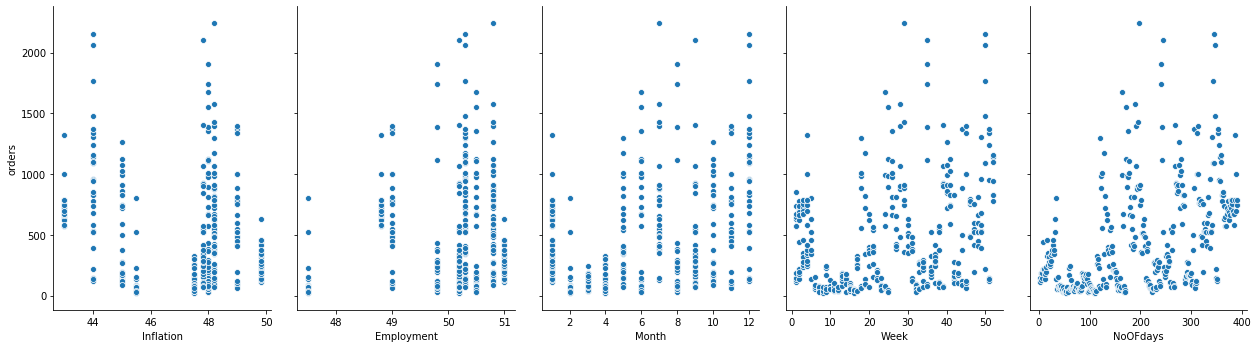

In [208]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset3, x_vars=['Inflation','Employment','Month','Week','NoOFdays'], y_vars='orders',size=5, aspect=0.7, kind='scatter')


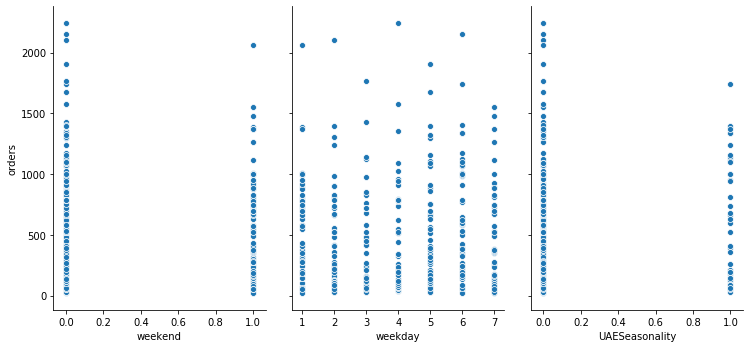

In [209]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset3, x_vars=['weekend','weekday','UAESeasonality'], y_vars='orders',size=5, aspect=0.7, kind='scatter')
#dummy variables like weekday weekend are not useful for plots

In [210]:
#Some further exploration of the data, especially to treat outliers as a next step

dataset3.describe()


,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,2303.565241,1483.969577,79.965244,752.570131,459.682864,54.422832,4.002558,0.286445,0.135550,47.130946,50.010997,2019.066496,6.158568,24.846547,15.572890
std,113.016223,2278.667850,1149.003257,157.964801,1302.020131,435.850488,10.617420,2.004481,0.452679,0.342749,1.925747,0.930319,0.249467,3.609165,15.724780,8.744767
min,1.000000,0.000000,111.170000,0.000000,0.000000,22.000000,32.979825,1.000000,0.000000,0.000000,43.000000,47.500000,2019.000000,1.000000,1.000000,1.000000
25%,98.500000,122.935000,669.282690,0.000000,0.000000,101.000000,48.359530,2.000000,0.000000,0.000000,45.500000,49.800000,2019.000000,3.000000,11.000000,8.000000
50%,196.000000,1758.020000,1072.945453,0.000000,87.115500,320.000000,53.326620,4.000000,0.000000,0.000000,48.000000,50.300000,2019.000000,6.000000,25.000000,16.000000
75%,293.500000,3835.649995,2087.814630,85.414998,825.000000,733.500000,58.687278,6.000000,1.000000,0.000000,48.200000,50.500000,2019.000000,9.000000,38.500000,23.000000
max,391.000000,9574.029999,7715.014317,860.160032,6900.000000,2242.000000,173.180000,7.000000,1.000000,1.000000,49.800000,51.000000,2020.000000,12.000000,52.000000,31.000000


In [211]:
#Getting ready to Remove outliers that are outside 1st quantile Q1 and 3rd Quantile Q3
#Looking at the results below, From 391 rows, we are down to 195 rows so we have lost almost half the data in this process!
#To be honest I dont really want to lose half the data given my small sample so I will normalize the data and see if the
#model fits after that. Outliers would still impact out constant term's significance eventually but we will see

Q1 = dataset3.quantile(0.25)
Q3 = dataset3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NoOFdays           195.000000
facebook          3712.714995
google            1418.531940
criteo              85.414998
affiliates         825.000000
orders             632.500000
price               10.327747
weekday              4.000000
weekend              1.000000
UAESeasonality       0.000000
Inflation            2.700000
Employment           0.700000
Year                 0.000000
Month                6.000000
Week                27.500000
Days                15.000000
dtype: float64


In [212]:
#Just for experimentation purposes, checking a different number for the quantiles. 
#Also because in the above calculation you can see that criteo is now quite close to its mean which means a lot of the variation
#has been removed. But at the same time, we are interested in MODELLING the variation so I would rather use a  more complex 
#methodology and model the variation, instead of removing the tremendous amount of data cause it has outliers, trying to force fit the regression
#I dont agree with losing 40% of the sample in trying to treat outliers. Especially when I only have 391 observations anyway!

Q11 = dataset3.quantile(0.20)
Q33 = dataset3.quantile(0.80)
IQR1 = Q33 - Q11
print(IQR1)

NoOFdays           234.000000
facebook          4202.579997
google            1731.229347
criteo             140.819994
affiliates        1635.000000
orders             720.000000
price               13.511949
weekday              4.000000
weekend              1.000000
UAESeasonality       0.000000
Inflation            3.200000
Employment           1.800000
Year                 0.000000
Month                8.000000
Week                33.000000
Days                18.000000
dtype: float64


In [213]:
#Removing the outliers from the data. I wont build a regression using it for now. Maybe later if I have time. 
dataset4 = dataset3[~((dataset3 < (Q1 - 1.5 * IQR)) |(dataset3 > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset4.shape
#Shape shows that we are left with 236 rows, down from 390 rows we have. Sample down by 40%.

(236, 16)

In [214]:
dataset4.head(20)

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
5,6,0.0,643.570000,0.0,0.0,189,52.824286,2,0,0,49.8,51.0,2019,1,1,6
6,7,0.0,669.430000,0.0,0.0,217,53.855668,3,0,0,49.8,51.0,2019,1,2,7
7,8,0.0,705.540000,0.0,0.0,443,50.438194,4,0,0,49.8,51.0,2019,1,2,8
8,9,0.0,598.900000,0.0,0.0,208,53.704038,5,0,0,49.8,51.0,2019,1,2,9
9,10,0.0,606.600000,0.0,0.0,222,49.249459,6,0,0,49.8,51.0,2019,1,2,10
10,11,0.0,473.120000,0.0,0.0,140,53.186143,7,1,0,49.8,51.0,2019,1,2,11
11,12,0.0,499.140000,0.0,0.0,181,58.637735,1,1,0,49.8,51.0,2019,1,2,12
12,13,0.0,494.390000,0.0,0.0,198,52.162105,2,0,0,49.8,51.0,2019,1,2,13
13,14,0.0,532.940000,0.0,0.0,235,55.608511,3,0,0,49.8,51.0,2019,1,3,14
14,15,0.0,535.850000,0.0,0.0,323,56.745139,4,0,0,49.8,51.0,2019,1,3,15


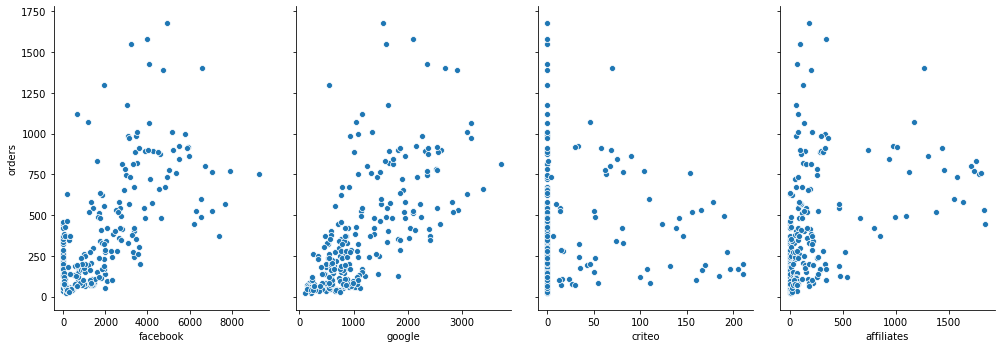

In [215]:
# Visualise the relationship between the features and the response using scatterplots, now that outliers have been removed
sns.pairplot(dataset4, x_vars=['facebook','google','criteo','affiliates'], y_vars='orders',size=5, aspect=0.7, kind='scatter')


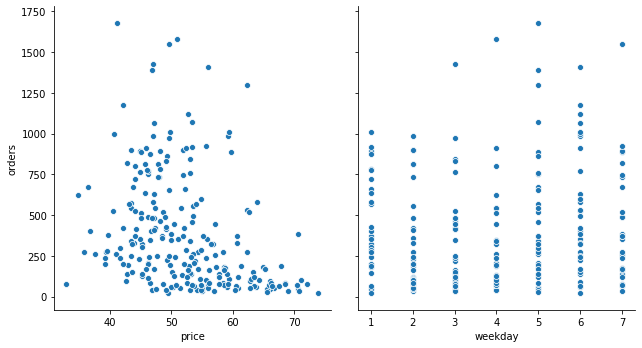

In [216]:
# Visualise some more relationships between the features and the response using scatterplots
sns.pairplot(dataset4, x_vars=['price','weekday'], y_vars='orders',size=5, aspect=0.9, kind='scatter')


In [217]:
#I still have outliers as per the diagrams above.
#Lets try the standard deviation method for removing outliers instead of IQR we used before, and see if its more restrictive. 
#We choose to remove any data beyond 2SD

dataset6 = dataset3

from scipy import stats

z = np.abs(stats.zscore(dataset3))

dataset7 = dataset6[(z < 2).all(axis=1)]
dataset7.shape

#This method is almost as penalizing as much as IQR as we still we have lost 40% of data just to treat outliers!

(241, 16)

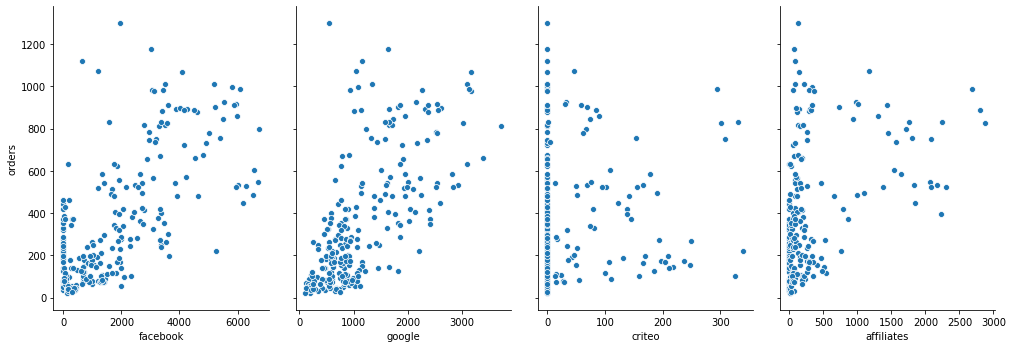

In [218]:
#Lets Visualize the data now that we have removed data outside 2SD
sns.pairplot(dataset7, x_vars=['facebook','google','criteo','affiliates'], y_vars='orders',size=5, aspect=0.7, kind='scatter')

#I mean I can still see outliers. Which means more than 40% of the data has outliers.

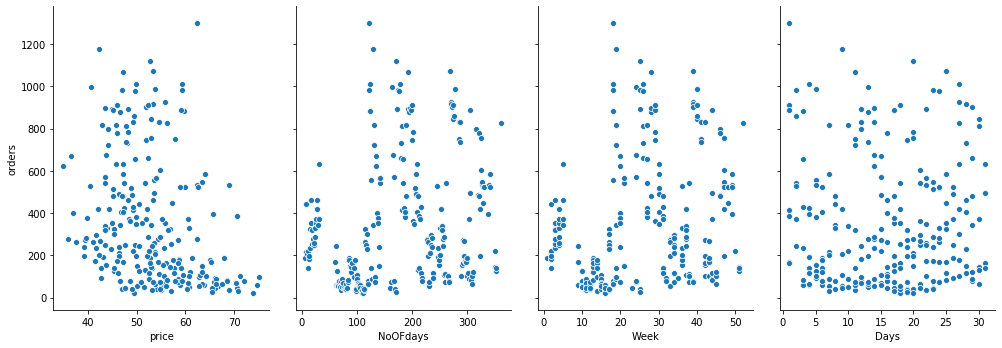

In [219]:
#Lets Visualize some other variables now that we have removed data outside 2SD
sns.pairplot(dataset7, x_vars=['price','NoOFdays','Week','Days'], y_vars='orders',size=5, aspect=0.7, kind='scatter')


<h2> 5. Model Development Round 2 <h/2>

<h4> I believe the fit of the models should improve now that outliers have been treated. In n dataset7 outliers have been removed, but in dataset6 we have only normalized the data and not removed outliers. I will build some models below using 
    dataset6 which INCLUDES the outliers and is a bigger sample. Because I do not fundamentally agree with remvoing outliers in a situation where more than 40% of rows are lost due to that. There are more modern approaches to this that we can use 
    instead of force fitting a linear regression and losing more than half the data along the way<h/4>
    

In [220]:
dataset6.describe()

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,2303.565241,1483.969577,79.965244,752.570131,459.682864,54.422832,4.002558,0.286445,0.135550,47.130946,50.010997,2019.066496,6.158568,24.846547,15.572890
std,113.016223,2278.667850,1149.003257,157.964801,1302.020131,435.850488,10.617420,2.004481,0.452679,0.342749,1.925747,0.930319,0.249467,3.609165,15.724780,8.744767
min,1.000000,0.000000,111.170000,0.000000,0.000000,22.000000,32.979825,1.000000,0.000000,0.000000,43.000000,47.500000,2019.000000,1.000000,1.000000,1.000000
25%,98.500000,122.935000,669.282690,0.000000,0.000000,101.000000,48.359530,2.000000,0.000000,0.000000,45.500000,49.800000,2019.000000,3.000000,11.000000,8.000000
50%,196.000000,1758.020000,1072.945453,0.000000,87.115500,320.000000,53.326620,4.000000,0.000000,0.000000,48.000000,50.300000,2019.000000,6.000000,25.000000,16.000000
75%,293.500000,3835.649995,2087.814630,85.414998,825.000000,733.500000,58.687278,6.000000,1.000000,0.000000,48.200000,50.500000,2019.000000,9.000000,38.500000,23.000000
max,391.000000,9574.029999,7715.014317,860.160032,6900.000000,2242.000000,173.180000,7.000000,1.000000,1.000000,49.800000,51.000000,2020.000000,12.000000,52.000000,31.000000


In [221]:
#Normalize the data. Note that I am using dataset6 here, which INCLUDES the outliers and entire sample

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
Ndataset6 = dataset6.apply(normalize) 

In [222]:
Ndataset6.shape

(391, 16)

In [223]:
Ndataset6.head(5)

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
0,0.000000,0.0,0.054071,0.0,0.0,0.041892,0.133384,0.500000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000
1,0.002564,0.0,0.067741,0.0,0.0,0.056306,0.180769,0.666667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.033333
2,0.005128,0.0,0.066732,0.0,0.0,0.072523,0.146909,0.833333,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.066667
3,0.007692,0.0,0.050407,0.0,0.0,0.046847,0.167568,1.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.100000
4,0.010256,0.0,0.060198,0.0,0.0,0.054955,0.149502,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.133333


In [224]:
#Take logs and just keep it in case we might run a log regression on this

Ldataset6 = np.log(dataset6 + 1)

In [225]:
Ldataset6.head(5)

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
0,0.693147,0.0,6.260193,0.0,0.0,4.753590,3.964242,1.609438,0.000000,0.693147,3.927896,3.951244,7.610853,0.693147,0.693147,0.693147
1,1.098612,0.0,6.441361,0.0,0.0,4.997212,4.083008,1.791759,0.000000,0.693147,3.927896,3.951244,7.610853,0.693147,0.693147,1.098612
2,1.386294,0.0,6.429058,0.0,0.0,5.214936,3.999604,1.945910,0.000000,0.693147,3.927896,3.951244,7.610853,0.693147,0.693147,1.386294
3,1.609438,0.0,6.205487,0.0,0.0,4.844187,4.051313,2.079442,0.693147,0.693147,3.927896,3.951244,7.610853,0.693147,0.693147,1.609438
4,1.791759,0.0,6.345478,0.0,0.0,4.976734,4.006242,0.693147,0.693147,0.693147,3.927896,3.951244,7.610853,0.693147,0.693147,1.791759


In [226]:
Ldataset6.shape

(391, 16)

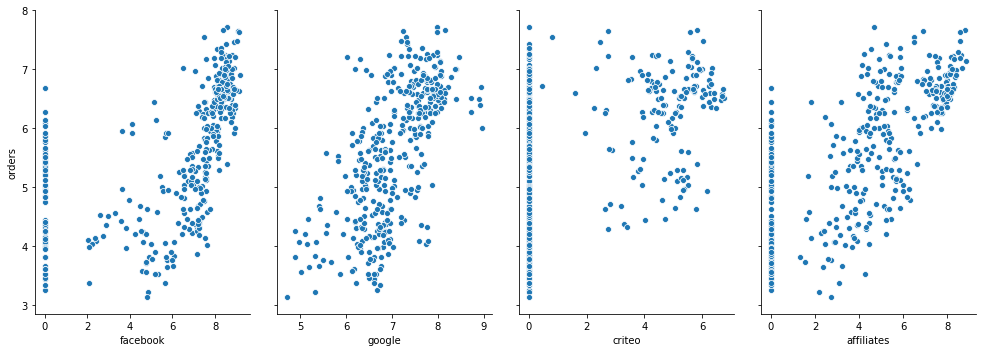

In [227]:
#Lets Visualize the data now that we have have taken logs. 
sns.pairplot(Ldataset6, x_vars=['facebook','google','criteo','affiliates'], y_vars='orders',size=5, aspect=0.7, kind='scatter')


In [228]:
#Take differences of logs. The first row will become NaN so drop that row
DLdataset6 = Ldataset6.diff()
DLdataset6 = DLdataset6.dropna()

In [229]:
DLdataset6.describe()

,NoOFdays,facebook,google,criteo,affiliates,orders,price,weekday,weekend,UAESeasonality,Inflation,Employment,Year,Month,Week,Days
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.013534,0.020847,0.004123,0.014596,0.020452,0.004909,0.000552,-0.001310,0.000000,-0.001777,-0.000368,-0.000111,0.000001,0.000000,0.002349,0.006674
std,0.032966,0.953034,0.318515,0.506876,0.996664,0.674608,0.166121,0.574319,0.371929,0.144891,0.009202,0.005533,0.000025,0.100429,0.172031,0.499438
min,0.002554,-7.368560,-1.384288,-4.195667,-4.642048,-2.782102,-1.209785,-1.386294,-0.693147,-0.693147,-0.105361,-0.069680,0.000000,-1.871802,-3.277145,-2.772589
25%,0.003398,-0.159426,-0.158934,0.000000,-0.218700,-0.274735,-0.062784,0.133531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040822
50%,0.005076,0.000000,0.006661,0.000000,0.000000,-0.016683,-0.000880,0.182322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058892
75%,0.010025,0.090472,0.136912,0.000000,0.224192,0.213378,0.064058,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105361
max,0.405465,6.502910,1.895834,5.703259,4.251209,3.655572,0.879023,0.405465,0.693147,0.693147,0.083382,0.060018,0.000495,0.405465,0.405465,0.405465


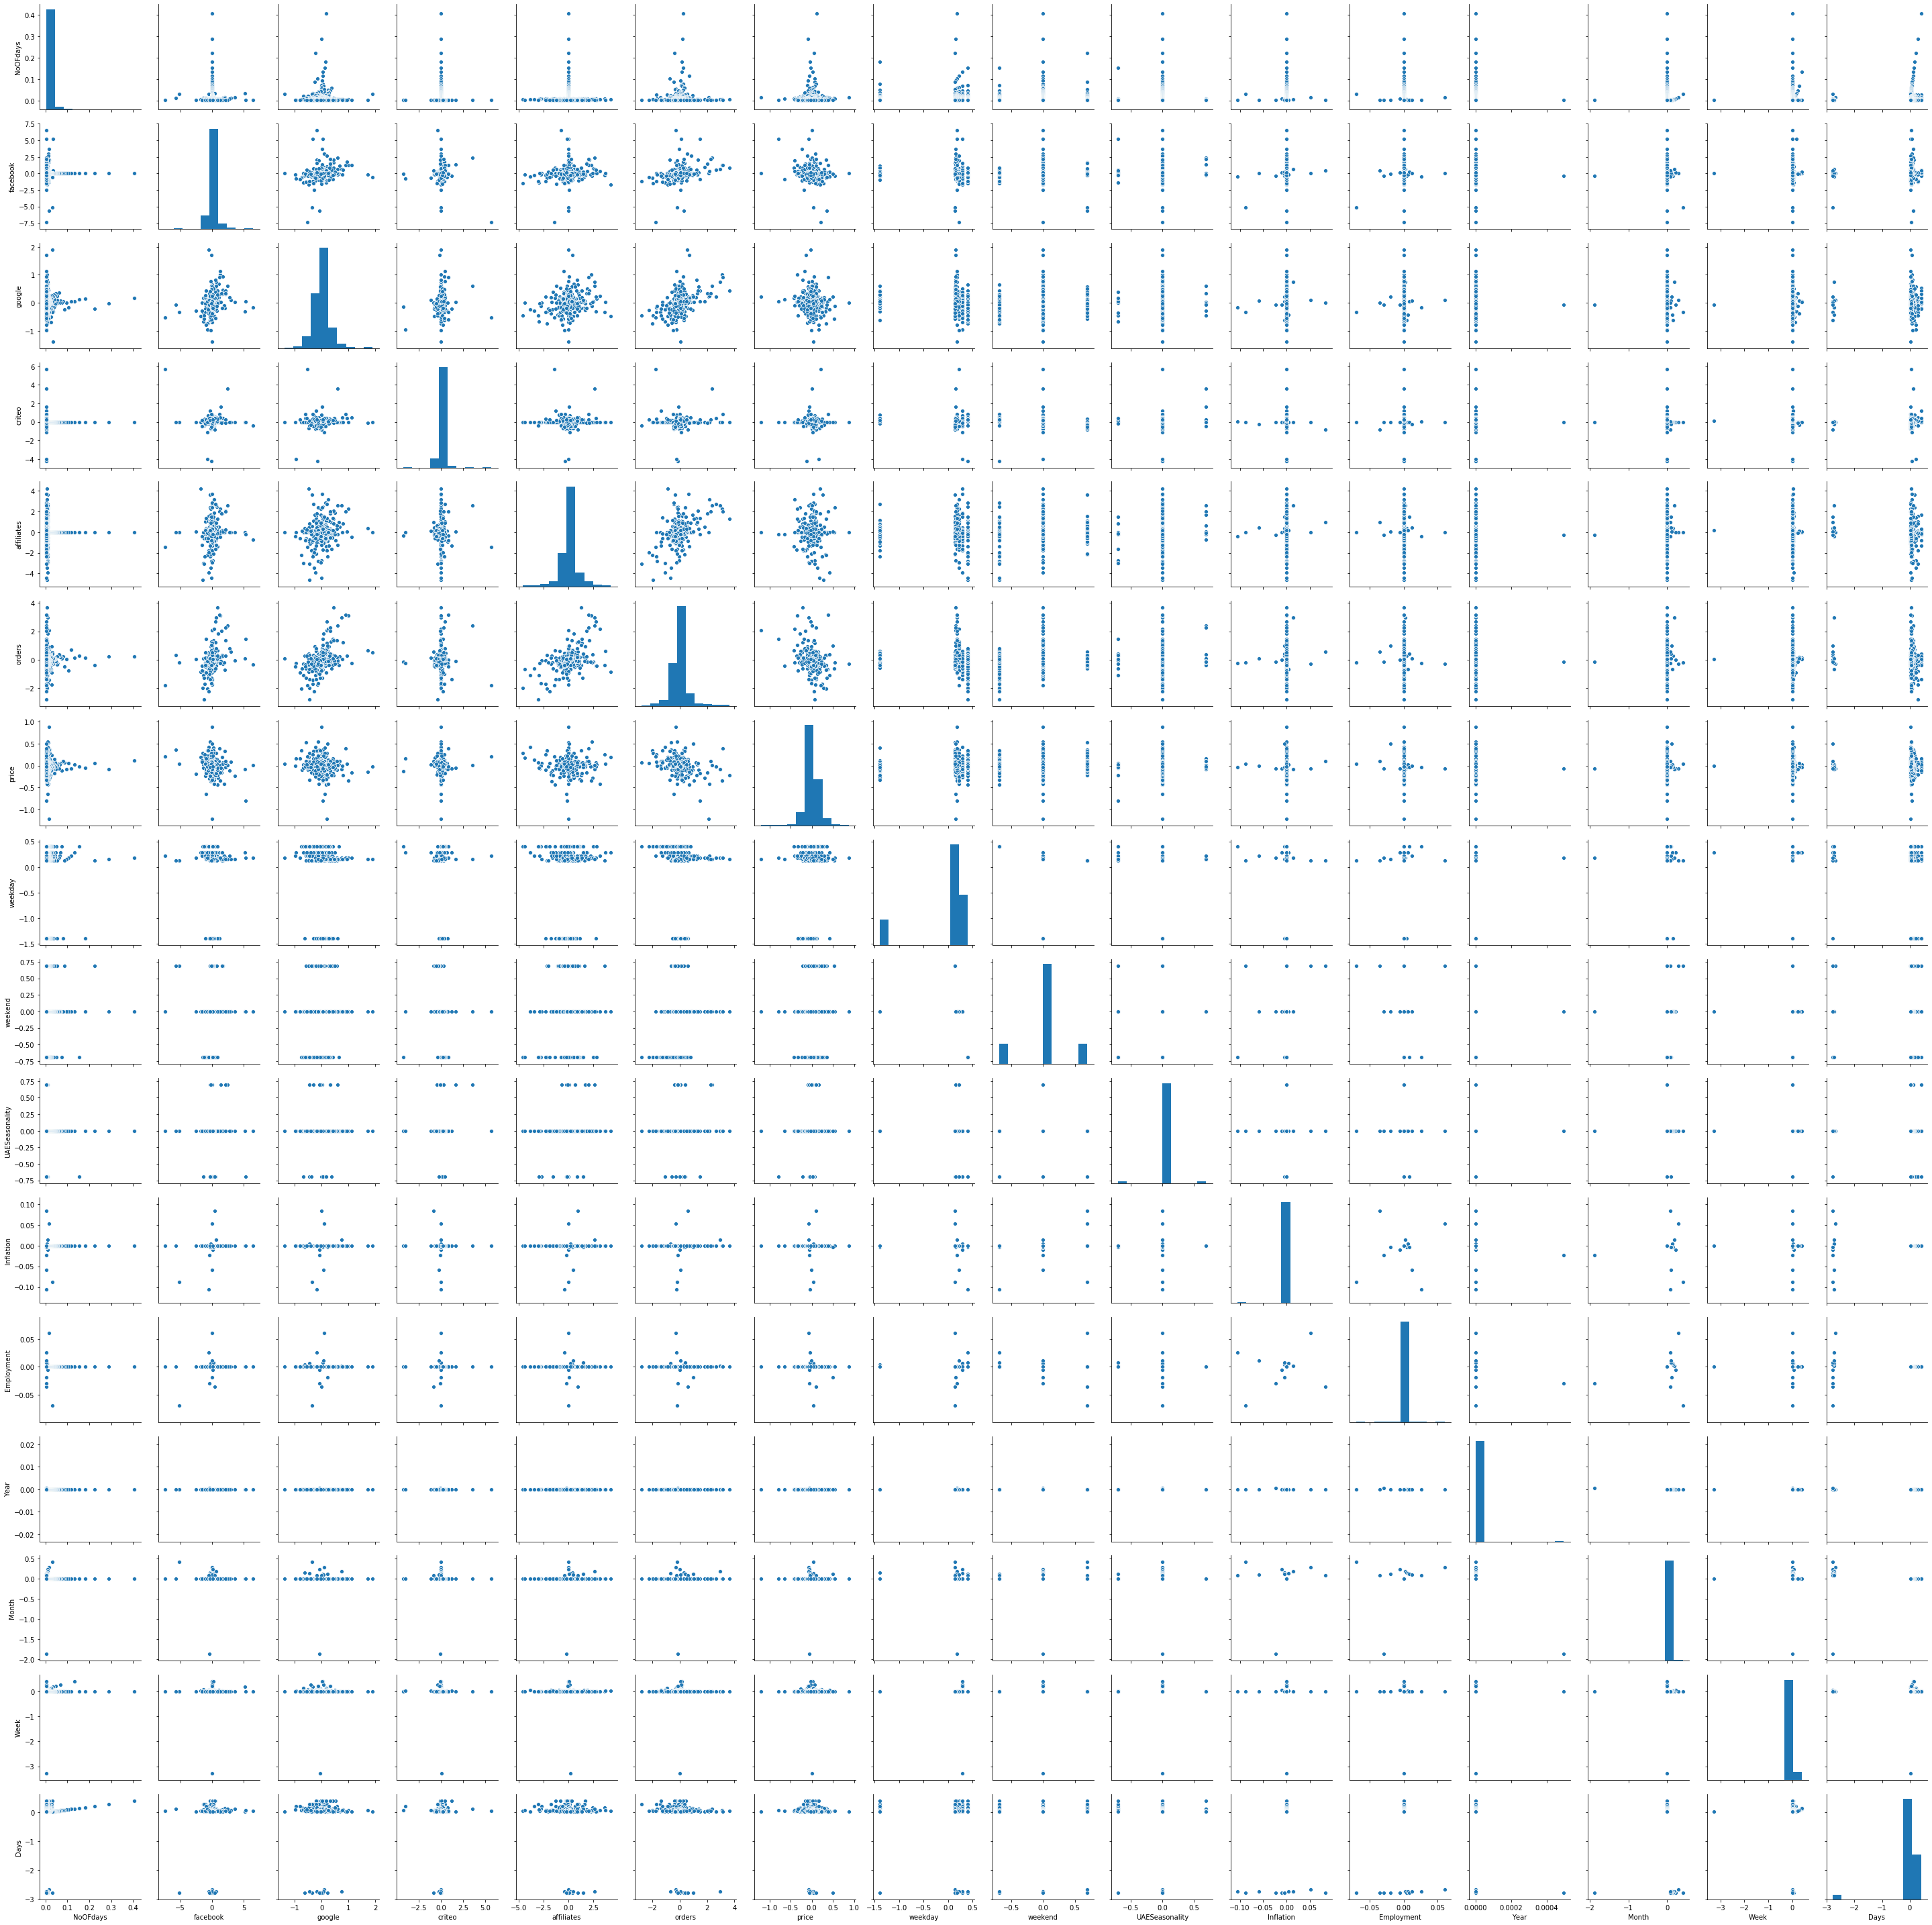

In [230]:
#Lets Visualize the log differenced data now. We might use it in a regression later on
sns.pairplot(DLdataset6)


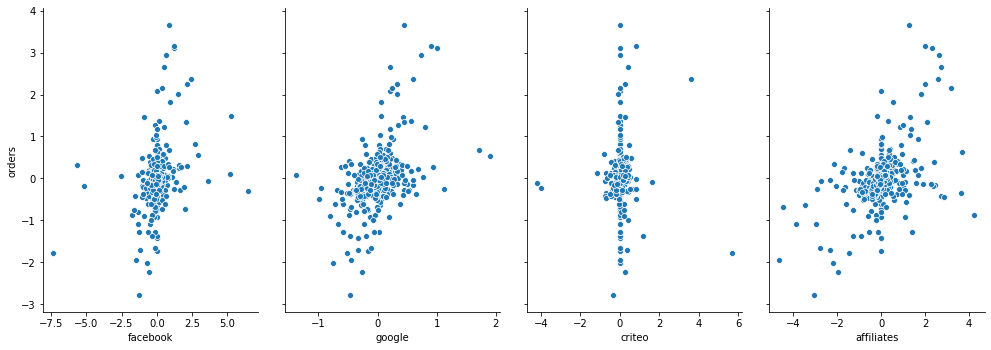

In [231]:
#Zooming in a little into the log differenced data. 
sns.pairplot(DLdataset6, x_vars=['facebook','google','criteo','affiliates'], y_vars='orders',size=5, aspect=0.7, kind='scatter')


<h4> Model 4 - OLS Regression with normalized data, where outliers outside 2SD were NOT removed <h/4>

In [232]:
Ndataset6.columns

Index(['NoOFdays', 'facebook', 'google', 'criteo', 'affiliates', 'orders',
       'price', 'weekday', 'weekend', 'UAESeasonality', 'Inflation',
       'Employment', 'Year', 'Month', 'Week', 'Days'],
      dtype='object')

In [233]:
#All 391 rows still present

Ndataset6.shape

(391, 16)

In [234]:
# Putting feature variable to X
X = Ndataset6[['NoOFdays', 'facebook', 'google', 'criteo', 'affiliates',
       'price', 'weekday', 'weekend', 'UAESeasonality', 'Inflation',
       'Employment', 'Year', 'Month', 'Week', 'Days']]

# Putting response variable to y
y = Ndataset6['orders']

In [235]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [236]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
Nlm_1 = sm.OLS(y_train,X_train).fit()

In [237]:
#Let's see the summary of our model
print(Nlm_1.summary())
#The fit looks good. Durban Watson (autocorrelation) is also low but we have quite a few insignificant variables. Lets deal with them

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     37.38
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.34e-56
Time:                        01:45:28   Log-Likelihood:                 216.11
No. Observations:                 273   AIC:                            -400.2
Df Residuals:                     257   BIC:                            -342.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0804      0.044      1.

In [238]:
# Vif function is used for checking multicollinearity amongst X variables. 
#Basically the vif function puts each explanatory variable as an independent variable and checks to see how well
#do the other variables predict this particular explanatory variables. If Vif value is high, it means other variables predict this variable and hence it is a sign of multicollinearity
#Below is a function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

#The higher the Vif value, the more likely the variable is correlated to other explanatory variables.
#Once we discover an INsignificant P value, we also check the Vif value, and if Vif value is too high then we remove that variable
#from our regression. Very seldom would it be that a genuinely sugnificant variable would have these both values outside acceptable limits

In [239]:
# Calculating Vif value|
vif_cal(input_data=Ndataset6, dependent_col="orders")

,Var,Vif
0,NoOFdays,195197.53
12,Month,140521.58
11,Year,34015.43
14,Days,1116.17
13,Week,67.37
10,Employment,16.31
9,Inflation,10.85
1,facebook,5.42
5,price,4.70
3,criteo,4.54


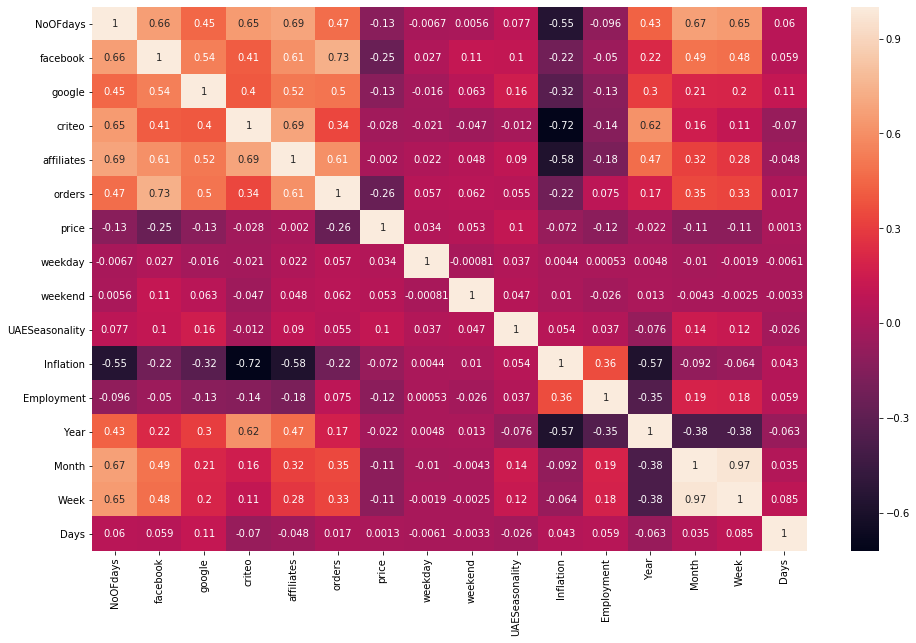

In [240]:
# Let's see the correlation matrix 
#We are looking for variables that have a high Vif value, as well as a high correlation value with other X variables. 
#We will then remove these variables and run the model again

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(Ndataset6.corr(),annot = True)

<h4> Model 5 - Dropping some variables included in the previous model 4. This is the "Hendrification" approach, going from "General to Specific" 
    Remember here we have the OLS Regression with normalized data, where outliers outside 2SD are present but some variables were removed due to their correlations and Vif value (multicollinearity) <h/4>

In [241]:
# Dropping highly correlated variables and insignificant variables from previous model 4
X_train = X_train.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week'], axis=1)

In [242]:
# Create a fitted model 5
Nlm_2 = sm.OLS(y_train,X_train).fit()

In [243]:
#Let's see the summary of this model
print(Nlm_2.summary())

#fit is pretty much the same. We still have some insignificant variables to deal with

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     52.04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.50e-56
Time:                        01:45:29   Log-Likelihood:                 207.46
No. Observations:                 273   AIC:                            -392.9
Df Residuals:                     262   BIC:                            -353.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0009      0.039     -0.

In [244]:
# Calculating Vif value
vif_cal(input_data=Ndataset6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week'], axis=1), dependent_col="orders")

,Var,Vif
8,Inflation,10.16
9,Employment,8.81
4,price,4.34
0,facebook,4.20
3,affiliates,3.76
1,google,3.61
2,criteo,3.15
5,weekday,3.04
6,weekend,1.44
7,UAESeasonality,1.22


<h4> Model 6 - Dropping some variables included in the previous model 5. This is the "Hendrification" approach, going from "General to Specific" 
    Remember this is OLS Regression with normalized data, where outliers outside 2SD are present and some variables were removed <h/4>

In [245]:
# Dropping highly correlated variables and insignificant variables from previous model 5
X_train = X_train.drop(['weekday', 'weekend'], axis=1)

In [246]:
# Create another fitted model using remaining variables
Nlm_3 = sm.OLS(y_train,X_train).fit()

In [247]:
#Let's see the summary of this model
print(Nlm_3.summary())

#still need to deal with some insignificant variables. R squared and Durban Watson are quite steady as we remove these variables. Good sign

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     65.51
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.40e-58
Time:                        01:45:30   Log-Likelihood:                 207.40
No. Observations:                 273   AIC:                            -396.8
Df Residuals:                     264   BIC:                            -364.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0015      0.037      0.

In [248]:
# Calculating Vif value
vif_cal(input_data=Ndataset6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week', 'weekday', 'weekend'], axis=1), dependent_col="orders")

,Var,Vif
6,Inflation,9.89
7,Employment,8.69
0,facebook,4.13
4,price,4.06
3,affiliates,3.75
1,google,3.60
2,criteo,3.12
5,UAESeasonality,1.22


<h4> Model 7 - Dropping some variables included in the previous model 6. This is the "Hendrification" approach, going from "General to Specific" 
    Remember this is OLS Regression with normalized data, where outliers outside 2SD are present and some variables were removed <h/4>

In [249]:
# Dropping highly correlated variables and insignificant variables from previous model 6
X_train = X_train.drop(['UAESeasonality'], axis=1)

In [250]:
# Create another fitted model
Nlm_4 = sm.OLS(y_train,X_train).fit()

In [251]:
#Let's see the summary of this model
print(Nlm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     75.09
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.87e-59
Time:                        01:45:30   Log-Likelihood:                 207.33
No. Observations:                 273   AIC:                            -398.7
Df Residuals:                     265   BIC:                            -369.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.037      0.022      0.9

In [252]:
# Calculating Vif value
vif_cal(input_data=Ndataset6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week', 'weekday', 'weekend', 'UAESeasonality'], axis=1), dependent_col="orders")

,Var,Vif
5,Inflation,9.88
6,Employment,8.69
0,facebook,4.12
4,price,4.02
3,affiliates,3.74
1,google,3.55
2,criteo,3.10


<h4> Model 8 - Dropping some variables included in the previous model 6. This is the "Hendrification" approach, going from "General to Specific" 
    OLS Regression with normalized data, where outliers outside 2SD are present and some variables were removed <h/4>

<h2> Heads up! This model given below is fitting. We will evaluate it further in the next phase. We will call this model "Normalized Fit Model 1" <h/2>
    

In [253]:
# Dropping highly correlated variables and insignificant variables from previous model 7
X_train = X_train.drop(['Inflation'], axis=1)

In [254]:
# Create a fitted model
Nlm_5 = sm.OLS(y_train,X_train).fit()

In [255]:
#Let's see the summary of the model
print(Nlm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     87.44
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           4.79e-60
Time:                        01:45:30   Log-Likelihood:                 206.82
No. Observations:                 273   AIC:                            -399.6
Df Residuals:                     266   BIC:                            -374.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.030     -0.678      0.4

In [256]:
# Calculating Vif value
vif_cal(input_data=Ndataset6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week', 'weekday', 'weekend', 'Inflation', 'UAESeasonality'], axis=1), dependent_col="orders")

,Var,Vif
5,Employment,4.12
0,facebook,3.75
3,affiliates,3.58
1,google,3.52
4,price,3.36
2,criteo,2.38


<h4> Model 9 - Dropping some variables included in the previous model 8. This is the "Hendrification" approach, going from "General to Specific" OLS Regression with normalized data, where outliers outside 2SD are present and some variables were removed <h/4>

<h2> Heads up! This model given below is also fitting. Surprisingly our constant term is insignifiant. We will evaluate it further in the next phase. We will call this model "Normalized Without Constant Term Fit Model 2"  <h/2>

In [257]:
# Dropping highly correlated variables and insignificant variables
#I think its the outliers due to which the constant term has become insignificant. Essentially its saying that there is so much variation in orders that the constant term itself became insignificant due to a very low predictive power (co-efficient)
X_train = X_train.drop(['const'], axis=1)

In [258]:
# Create a fitted model
Nlm_6 = sm.OLS(y_train,X_train).fit()

In [259]:
#Let's see the summary of our  model
print(Nlm_6.summary())

#As you can see the fit of the model is improved tremendously now. R squared 83% whereas Durban Watson is low

                                 OLS Regression Results                                
Dep. Variable:                 orders   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              221.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                   1.59e-100
Time:                        01:45:30   Log-Likelihood:                          206.58
No. Observations:                 273   AIC:                                     -401.2
Df Residuals:                     267   BIC:                                     -379.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [260]:
# Calculating Vif value
vif_cal(input_data=Ndataset6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week', 'weekday', 'weekend', 'Inflation', 'UAESeasonality'], axis=1), dependent_col="orders")

,Var,Vif
5,Employment,4.12
0,facebook,3.75
3,affiliates,3.58
1,google,3.52
4,price,3.36
2,criteo,2.38


<h2> 6. Model Evaluation <h/2>

<h3> Lets make predictions and evaluate the "Normalized Fit Model 1" <h/3>
    
<h4> 1. Evaluate "Normalized Fit Model 1" 

In [261]:
# Adding  constant variable to test dataframe given that we have a constant as part of this regression
X_test_m6 = sm.add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [262]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(['NoOFdays', 'Month', 'Year', 'Days', 'Week', 'weekday', 'weekend', 'Inflation', 'UAESeasonality'], axis=1)

In [263]:
# Making predictions for order
y_pred_m6 = Nlm_5.predict(X_test_m6)

Text(0, 0.5, 'orders')

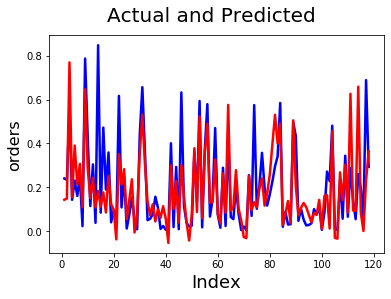

In [264]:
# Actual vs Predicted plot for orders
c = [i for i in range(1,119,1)]

fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('orders', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

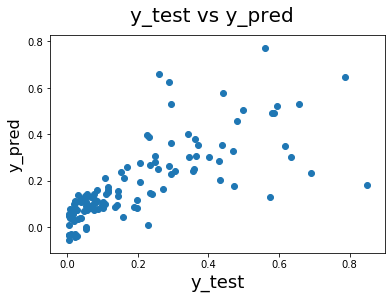

In [265]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#They do move together but we have outliers.

Text(0, 0.5, 'ytest-ypred')

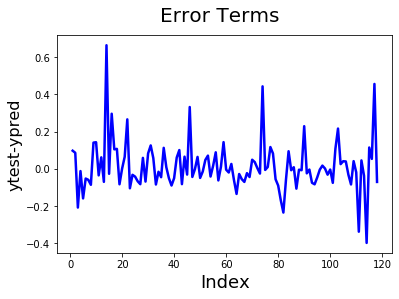

In [266]:
# Plotting error terms now. The error term seems to have a constant mean and somewhat constant variance albeit with outliers
fig = plt.figure()
c = [i for i in range(1,119,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

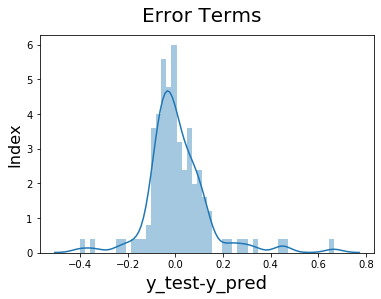

In [267]:
# Plotting the error terms to understand the distribution.Not exactly normal. Full of head and tail events, and skewed.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [268]:
#Performing some checks before I move onto denormalizing the data
y_pred_m6.head(5)

124    0.142987
140    0.148421
276    0.770043
252    0.155215
325    0.390179
dtype: float64

In [269]:
y_test.head(5)

124    0.240090
140    0.234234
276    0.561261
252    0.142793
325    0.230631
Name: orders, dtype: float64

In [270]:
#So now we can now denormalize the data to see further metrics. Starting with the test set

# UNNORMALIZED Uny_pred_m6 = (max - min)*y_pred_m6 + min (where min and max are from the dataset we had BEFORE normalizing)
Uny_test_m6 = (2242 - 22)*y_test + 22
Uny_test_m6.head(5)

124     555.0
140     542.0
276    1268.0
252     339.0
325     534.0
Name: orders, dtype: float64

In [271]:
#denormalize the predictions

Uny_pred_m6 = (2242 - 22)*y_pred_m6 + 22
Uny_pred_m6.head(5)

124     339.430755
140     351.495479
276    1731.495670
252     366.577496
325     888.196683
dtype: float64

In [272]:
#Lets view them side by side. Also we can picture the model misbehaviour in this way.
#As you can see for e.g. for row 43, sometimes it is just suddenly predicting a negative value for orders. We need to consider alternative techniques as our outliers are too large and too many

pd.DataFrame({'Uny_test_m6': Uny_test_m6, 'Uny_pred_m6': Uny_pred_m6, 'abs(Uny_test_m6-Uny_pred_m6)': abs(Uny_test_m6 - Uny_pred_m6)})

,Uny_test_m6,Uny_pred_m6,abs(Uny_test_m6-Uny_pred_m6)
124,555.0,339.430755,215.569245
140,542.0,351.495479,190.504521
276,1268.0,1731.495670,463.495670
252,339.0,366.577496,27.577496
325,534.0,888.196683,354.196683
136,378.0,494.921888,116.921888
368,572.0,704.123658,132.123658
132,72.0,263.359514,191.359514
342,1770.0,1457.798438,312.201562
174,976.0,658.943054,317.056946


In [273]:
#Now we can calculate the RMSE and MAE for the Orders series. They look relatively reasonable, considering the range and volatility of the orders field.

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(Uny_test_m6, Uny_pred_m6)))
print('MAE :', metrics.mean_absolute_error(Uny_test_m6, Uny_pred_m6))


RMSE : 295.85251330666324
MAE : 190.7521958534808


<h4> 2. Evaluate "Normalized Without Constant Term Fit Model 2" <h/4>

<h2> Lets make predictions and evaluate the "Normalized Without Constant Term Fit Model 2" <h/2>

In [274]:
# Dropping the constant term from X_test_m7 because we dropped that term for being insignificant in the regression
X_test_m7 = X_test_m6.drop(['const'], axis=1)

In [275]:
X_test_m7.columns

Index(['facebook', 'google', 'criteo', 'affiliates', 'price', 'Employment'], dtype='object')

In [276]:
# Making predictions for orders
y_pred_m7 = Nlm_6.predict(X_test_m7)

Text(0, 0.5, 'orders')

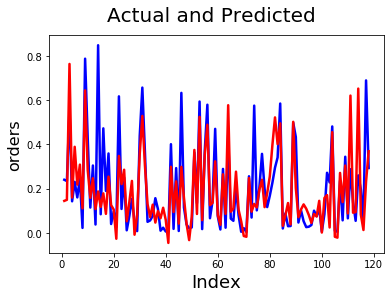

In [277]:
# Actual vs Predicted orders
c = [i for i in range(1,119,1)]

fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m7, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('orders', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

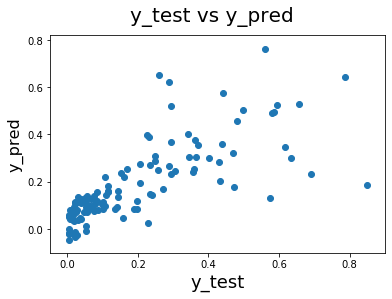

In [278]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

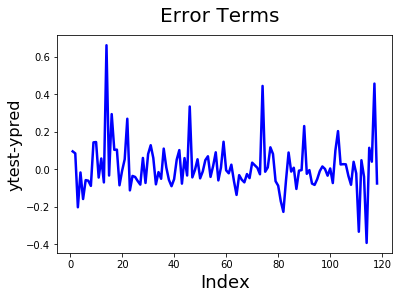

In [279]:
# Plotting error terms now. The error term seems to have a constant mean and somewhat constant variance albeit with outliers
fig = plt.figure()
c = [i for i in range(1,119,1)]
plt.plot(c,y_test-y_pred_m7, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

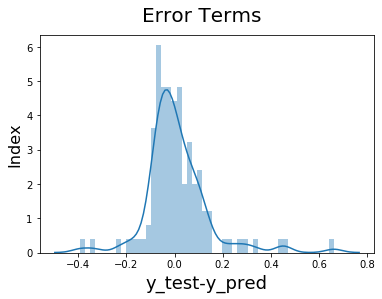

In [280]:
# Plotting the error terms to understand the distribution.Not exactly normal. Full of head and tail events, and skewed like before.
fig = plt.figure()
sns.distplot((y_test-y_pred_m7),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [281]:
#Performing some checks before I move onto denormalizing the data
y_pred_m7.head(5)

124    0.144648
140    0.149514
276    0.763607
252    0.159737
325    0.389089
dtype: float64

In [282]:
y_test.head(5)

124    0.240090
140    0.234234
276    0.561261
252    0.142793
325    0.230631
Name: orders, dtype: float64

In [283]:
#So now we can now denormalize the data to see further metrics. Starting with the test set

# UNNORMALIZED Uny_pred_m7 = (max - min)*y_pred_m7 + min (where min and max are from the dataset we had BEFORE normalizing)
Uny_test_m7 = (2242 - 22)*y_test + 22
Uny_test_m7.head(5)

124     555.0
140     542.0
276    1268.0
252     339.0
325     534.0
Name: orders, dtype: float64

In [284]:
#denormalize the predictions

Uny_pred_m7 = (2242 - 22)*y_pred_m7 + 22
Uny_pred_m7.head(5)

124     343.117635
140     353.920602
276    1717.206786
252     376.616024
325     885.776483
dtype: float64

In [285]:
#Lets view them side by side. Also we can picture the model misbehaviour in this way.
#Similarly like before, you can see for e.g. for row 43, sometimes it is just suddenly predicting a negative value for orders. We need to consider alternative techniques as our outliers are too large and too many

pd.DataFrame({'Uny_test_m7': Uny_test_m7, 'Uny_pred_m7': Uny_pred_m7, 'abs(Uny_test_m7-Uny_pred_m7)': abs(Uny_test_m7 - Uny_pred_m7)})

,Uny_test_m7,Uny_pred_m7,abs(Uny_test_m7-Uny_pred_m7)
124,555.0,343.117635,211.882365
140,542.0,353.920602,188.079398
276,1268.0,1717.206786,449.206786
252,339.0,376.616024,37.616024
325,534.0,885.776483,351.776483
136,378.0,505.649706,127.649706
368,572.0,706.926277,134.926277
132,72.0,268.189598,196.189598
342,1770.0,1451.543169,318.456831
174,976.0,653.691072,322.308928


In [286]:
#Now we can calculate the RMSE and MAE for the Orders series. They look relatively reasonable, considering the range and volatility of the orders field.

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(Uny_test_m7, Uny_pred_m7)))
print('MAE :', metrics.mean_absolute_error(Uny_test_m7, Uny_pred_m7))

#No major improvement on the previous model. very marginal.

RMSE : 293.9169084502276
MAE : 189.63236458164235


<h4> I can try clubbing the orders and spend into weekly slots but that would leave us with less data points. For now I have experimented enough with regression and it is clear that the data lacks completeness. I will now experiment with other methodologies. <h/4>

<h3> Now lets try what Gustavo initially mentioned about Saturation curve. During our meeting Mouhcine mentioned using Prophet library this can be done. <h/3>

<h4> Mouhcine's exercise <h4>

In [287]:
#I had numbers 0 till 10, in a row or list, and I had to print them vertically in a column, 
#by looping through each one of them by 1.

In [288]:
#lets first create a list
mylist = []
for x in range(0,11):
    mylist.append(str(x))
print (mylist)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


In [289]:
# Using for loop we can print the elements in the list
for i in mylist: 
    print(i) 

0
1
2
3
4
5
6
7
8
9
10


In [290]:
#Another example. Here we are looping by 2
mylist2 = []
for k in range(0, 10, 2):
     mylist2.append(str(k))
print(mylist2)

['0', '2', '4', '6', '8']


In [291]:
# Using for loop we can print the elements in the list
for i in mylist2: 
    print(i) 

0
2
4
6
8


In [292]:
#Not using a loop here but still printing the list by increment of 2
l = mylist[1::2]
print (l)

['1', '3', '5', '7', '9']


In [293]:
#More research can be done on the i++ method Mouhcine was mentioning